In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
#from imblearn.over_sampling import SMOTE

In [2]:
# import sklearn
# sklearn.__version__

In [3]:
# !pip install scikit-learn==1.2.2 --user

In [4]:
from imblearn.over_sampling import SMOTE

Load the dataset and explore the variables.

In [5]:
data = pd.read_csv('customer_churn.csv')

In [6]:
pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# check value_count to take a decision on what column to take

In [9]:
data['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [10]:
data['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [11]:
# We think they are highly correlated but we take a decision after the heatmap

In [12]:
data['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [13]:
data['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [14]:
data['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [15]:
for column in data.columns:
    print(f"Value counts for {column}:\n{data[column].value_counts()}\n")

Value counts for customerID:
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Value counts for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts for SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Value counts for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts for Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts for tenure:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Value counts for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone serv

In [16]:
data.isna().sum().sum()

0

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen, MonthlyCharges.

In [17]:
data1=data.drop(['customerID', 'TotalCharges'], axis=1)
# that was done before reading the point 3/ from the lab
# for the record to know what data1 is

In [18]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [19]:
data2=[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'churn']]
#maybe we need that for later

# select features
Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [20]:
X=data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y=data['Churn']

## Build the logistic regression model.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## MinMax Scaler

In [22]:
# Scaling data

X_train_num = X_train.select_dtypes(include = np.number) # I know not necessary because there is no num

transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_minmax = transformer.transform(X_train_num)

X_train_scaled = pd.DataFrame(X_train_minmax, columns=X_train_num.columns)
X_train_scaled

,tenure,SeniorCitizen,MonthlyCharges
0,0.611111,0.0,0.358706
1,0.375000,0.0,0.769652
2,0.027778,0.0,0.504478
3,0.027778,0.0,0.020896
4,0.166667,1.0,0.652239
...,...,...,...
5629,0.625000,0.0,0.076119
5630,0.041667,0.0,0.022886
5631,1.000000,0.0,0.499005
5632,0.069444,0.0,0.615920


In [23]:
X_test_num = X_test.select_dtypes(include = np.number)

X_test_normalized = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_scaled

,tenure,SeniorCitizen,MonthlyCharges
0,0.694444,0.0,0.022886
1,1.000000,0.0,0.015920
2,0.875000,0.0,0.502985
3,0.847222,0.0,0.059204
4,0.097222,0.0,0.010448
...,...,...,...
1404,0.666667,0.0,0.566169
1405,0.111111,0.0,0.201493
1406,0.527778,0.0,0.849751
1407,0.513889,0.0,0.805473


In [24]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Logistic Regression

In [25]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [26]:
LR.predict_proba(X_train_scaled)

array([[0.92368058, 0.07631942],
       [0.58111025, 0.41888975],
       [0.44897409, 0.55102591],
       ...,
       [0.97255137, 0.02744863],
       [0.40518049, 0.59481951],
       [0.3585097 , 0.6414903 ]])

In [27]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)
logits

array([ 2.49343893,  0.32733275, -0.20481664, ...,  3.56760659,
       -0.38392538, -0.58183836])

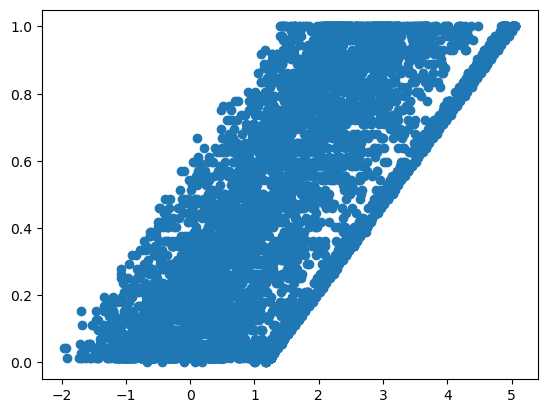

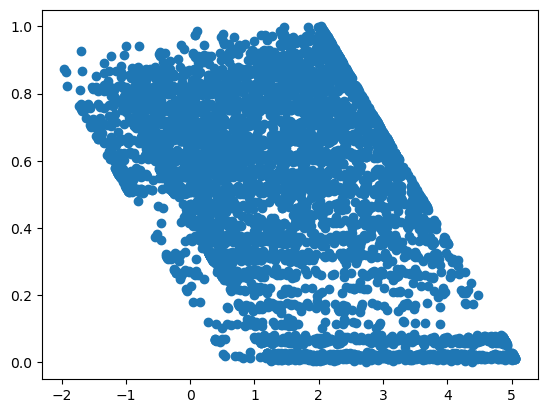

In [28]:
plt.scatter(logits,X_train_scaled['tenure'])
plt.show()

plt.scatter(logits,X_train_scaled['MonthlyCharges'])
plt.show()

In [29]:
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7771469127040455

Even a simple model will give us more than 70% accuracy. Why?

In [30]:
# Maybe because the data are imbalanced, way more No than Yes.
#So likelier to get the right prediction with imbalanced data by putting on the most frequent data

In [31]:
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

#here it would have been better to change the y to code with 1 and 0 instead of Yes or No

precision:  0.6277372262773723
recall:  0.4479166666666667
f1:  0.5227963525835866


In [32]:
y_test.value_counts()

Churn
No     1025
Yes     384
Name: count, dtype: int64

In [33]:
confusion_matrix(y_test,pred)

array([[923, 102],
       [212, 172]], dtype=int64)

In [34]:
Accuracy = (923+172)/len(pred)
Accuracy

0.7771469127040455

## Imbalanced data

In [35]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.611111,0.0,0.358706,No
1,0.375000,0.0,0.769652,No
2,0.027778,0.0,0.504478,Yes
3,0.027778,0.0,0.020896,No
4,0.166667,1.0,0.652239,Yes


In [36]:
no_churn = train[train['Churn']=='No']
yes_churn = train[train['Churn']=='Yes']

In [37]:
display(no_churn.shape)
display(yes_churn.shape)

(4149, 4)

(1485, 4)

## Oversampling

In [38]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, 
                                    replace=True, 
                                    n_samples = len(no_churn),
                                    random_state=0)

In [39]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)

(4149, 4)

(4149, 4)

In [40]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.611111,0.0,0.358706,No
1,0.375000,0.0,0.769652,No
3,0.027778,0.0,0.020896,No
8,0.013889,0.0,0.351244,No
9,0.250000,0.0,0.693035,No


In [41]:
y_train_over = train_oversampled['Churn']
X_train_over = train_oversampled.drop('Churn',axis = 1)

In [42]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.47766323024054985
recall:  0.7239583333333334
f1:  0.5755693581780539


In [43]:
confusion_matrix(y_test,pred)

array([[721, 304],
       [106, 278]], dtype=int64)

In [44]:
Accuracy_over = (721+278)/len(pred)
Accuracy_over

0.709013484740951

## Undersampling

In [45]:
# undersample majority
no_churn_undersampled = resample(no_churn, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_churn),
                                    random_state=0)

In [46]:
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1485, 4)

(1485, 4)

In [47]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled], axis=0)
train_undersampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
2,0.027778,0.0,0.504478,Yes
4,0.166667,1.0,0.652239,Yes
5,0.013889,0.0,0.323881,Yes
6,0.055556,0.0,0.685075,Yes
7,0.805556,1.0,0.868159,Yes


In [48]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [49]:
LR_under = LogisticRegression(random_state=0, solver='lbfgs')
LR_under.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.6277372262773723
recall:  0.4479166666666667
f1:  0.5227963525835866


In [50]:
confusion_matrix(y_test,pred)

array([[923, 102],
       [212, 172]], dtype=int64)

In [56]:
Accuracy_under = (923+172)/len(pred)
Accuracy_under

0.7771469127040455

## SMOTE

Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [52]:
sm = SMOTE(random_state=100, k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [53]:
X_train_SMOTE.shape

(8298, 3)

In [54]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes')) #f1 predicts the % Yes predicted as True Yes

precision:  0.4819277108433735
recall:  0.7291666666666666
f1:  0.5803108808290155


In [55]:
confusion_matrix(y_test,pred)

array([[724, 301],
       [104, 280]], dtype=int64)

In [ ]:
## TN FP
## FN TP

In [57]:
Accuracy_smote = (724+280)/len(pred)
Accuracy_smote

0.7125621007806955

In [ ]:
# finding by definition
# accuracy = TP+TN / all
# precision = TP / (TP+FP)
# recall = TP / (TP+FN)
#f1_scores = 2*(precision * recall)/(precision+recall)

## Interpreting Results

In [ ]:
# After doing the 3 different models, the undersampling scaling has the best accuracy 
# BUT it is the same result as the basic model with imbalanced data.

# The Smote improved the oversampling scaling but not the undersampling

In [ ]:
# SMOTE has the best recall % + The lowest False Negativ values
# Oversampling has similar values as SMOTE, a little bit worst

In [ ]:
# I would choose either the SMOTE or Oversampling scaling